In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')
print(f"Shape do dataset: {df.shape}")

Shape do dataset: (891, 12)


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [88]:
cat = df.select_dtypes(include=['object']).columns.values

# printa moda, quantidade de valores únicos e quantidade de aparições da moda de cada variável categórica
for col in cat:
    print(f"Coluna: {col}")
    print(f"Moda: {df[col].mode()[0]}")
    print(f"Quantidade de valores únicos: {df[col].nunique()}")
    print(f"Quantidade de aparições da moda: {df[col].value_counts().max()}")
    print("-" * 40)

Coluna: Name
Moda: Abbing, Mr. Anthony
Quantidade de valores únicos: 891
Quantidade de aparições da moda: 1
----------------------------------------
Coluna: Sex
Moda: male
Quantidade de valores únicos: 2
Quantidade de aparições da moda: 577
----------------------------------------
Coluna: Ticket
Moda: 1601
Quantidade de valores únicos: 681
Quantidade de aparições da moda: 7
----------------------------------------
Coluna: Cabin
Moda: B96 B98
Quantidade de valores únicos: 147
Quantidade de aparições da moda: 4
----------------------------------------
Coluna: Embarked
Moda: S
Quantidade de valores únicos: 3
Quantidade de aparições da moda: 644
----------------------------------------
Coluna: Title
Moda: Mr
Quantidade de valores únicos: 17
Quantidade de aparições da moda: 517
----------------------------------------
Coluna: Title_Mapped
Moda: Mr
Quantidade de valores únicos: 5
Quantidade de aparições da moda: 517
----------------------------------------
Coluna: Deck
Moda: Unknown
Quantida

### Verificação de valores ausentes

In [12]:
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Coluna': missing_data.index,
    'Valores Ausentes': missing_data.values,
    'Percentual (%)': missing_percent.values
}).sort_values('Valores Ausentes', ascending=False)

display(missing_df[missing_df['Valores Ausentes'] > 0])

,Coluna,Valores Ausentes,Percentual (%)
10,Cabin,687,77.104377
5,Age,177,19.865320
11,Embarked,2,0.224467


### Distribuição da Target

Contagem:
Survived
0    549
1    342
Name: count, dtype: int64

Percentual:
Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


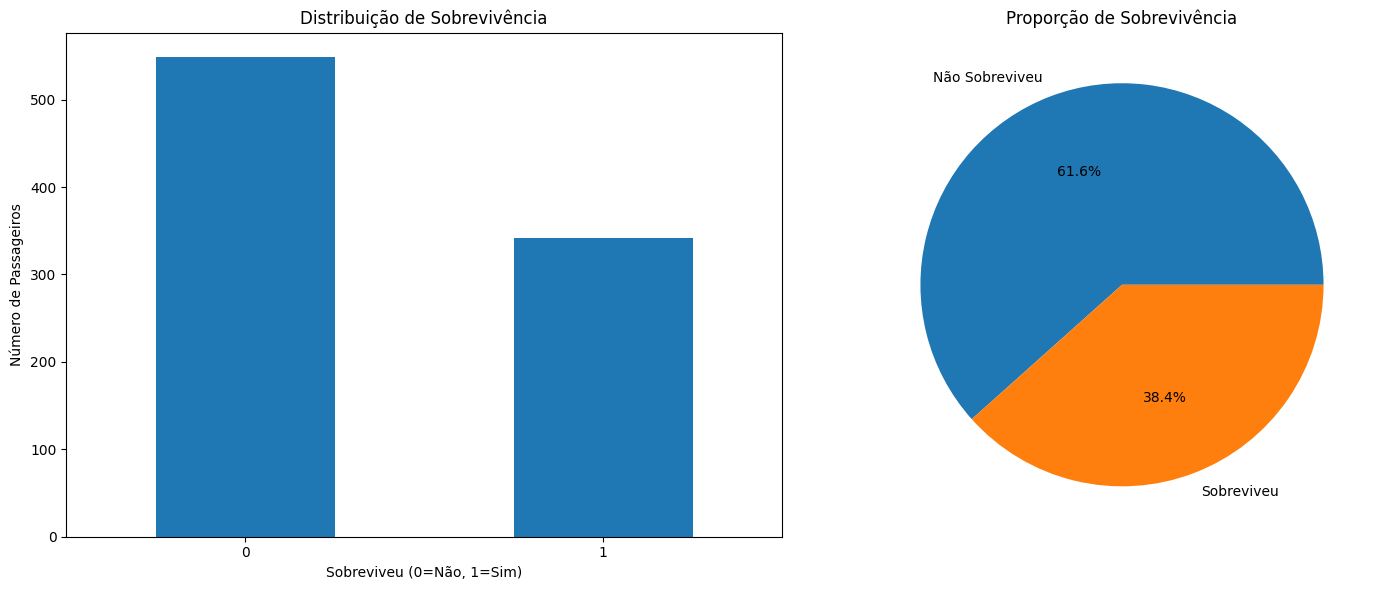

In [19]:
survival_counts = df['Survived'].value_counts()
survival_percent = df['Survived'].value_counts(normalize=True) * 100

print("Contagem:")
print(survival_counts)
print("\nPercentual:")
print(survival_percent)

# Visualização
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras
survival_counts.plot(kind='bar', ax=ax1)
ax1.set_title('Distribuição de Sobrevivência')
ax1.set_xlabel('Sobreviveu (0=Não, 1=Sim)')
ax1.set_ylabel('Número de Passageiros')
ax1.tick_params(axis='x', rotation=0)

# Gráfico de pizza
ax2.pie(survival_counts.values, labels=['Não Sobreviveu', 'Sobreviveu'], 
        autopct='%1.1f%%')
ax2.set_title('Proporção de Sobrevivência')

plt.tight_layout()
plt.show()

### Variáveis Categóricas

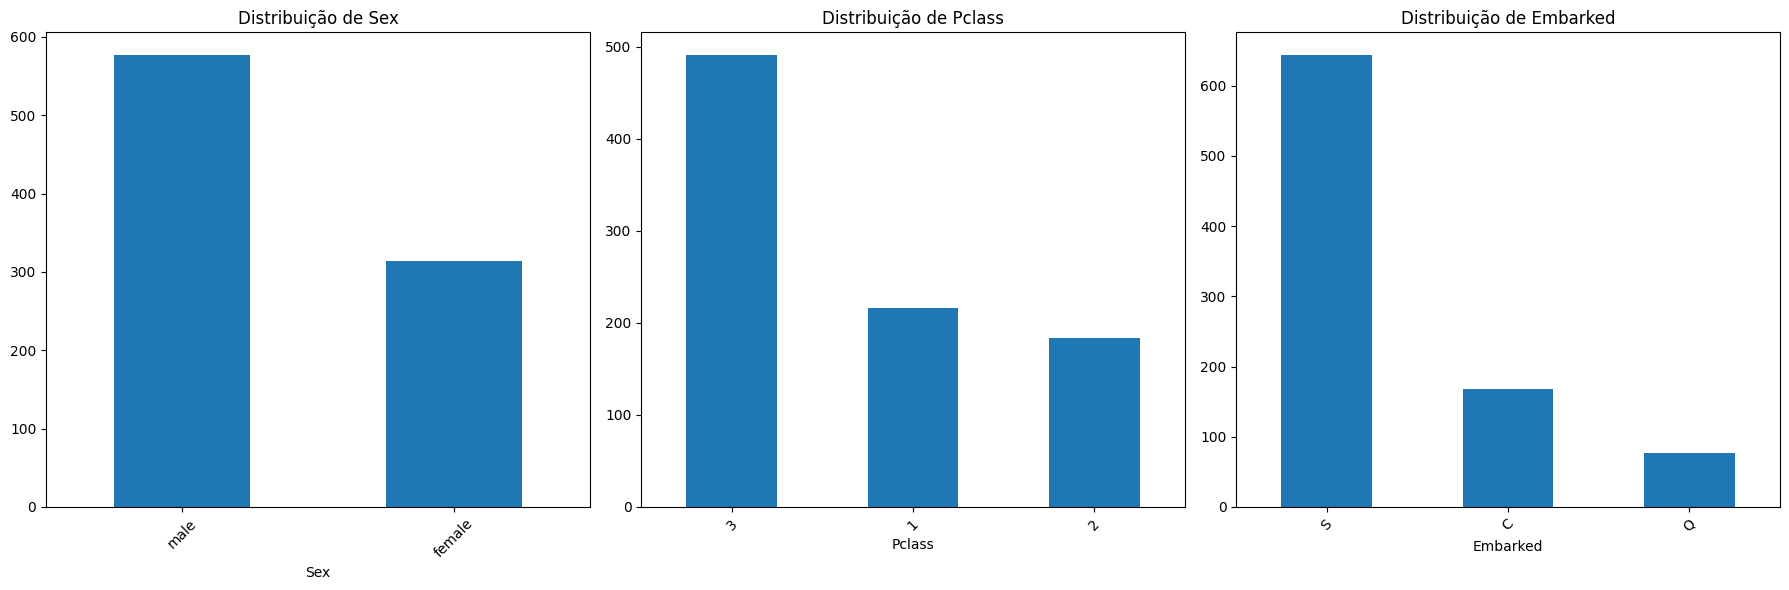

In [26]:
categorical_vars = ['Sex', 'Pclass', 'Embarked', 'Name', 'Cabin', 'Ticket']
vars_to_plot = [var for var in categorical_vars if var not in ['Name', 'Cabin', 'Ticket']]

fig, axes = plt.subplots(1, len(vars_to_plot), figsize=(6 * len(vars_to_plot), 6))
axes = axes.ravel()

for i, var in enumerate(vars_to_plot):
    if var in df.columns:
        df[var].value_counts().plot(kind='bar', ax=axes[i])
        axes[i].set_title(f'Distribuição de {var.title()}')
        axes[i].tick_params(axis='x', rotation=45)
    else:
        axes[i].text(0.5, 0.5, f'{var} não encontrada', ha='center', va='center')
        axes[i].set_title(f'{var.title()} - Não Disponível')

plt.tight_layout()
plt.show()

In [33]:
# quantidade valores únicos em cada variável categórica
for var in categorical_vars:
    if var in df.columns:
        unique_count = df[var].nunique()
        print(f"{var}: {unique_count}")

Sex: 2
Pclass: 3
Embarked: 3
Name: 891
Cabin: 147
Ticket: 681


### Variáveis Numéricas

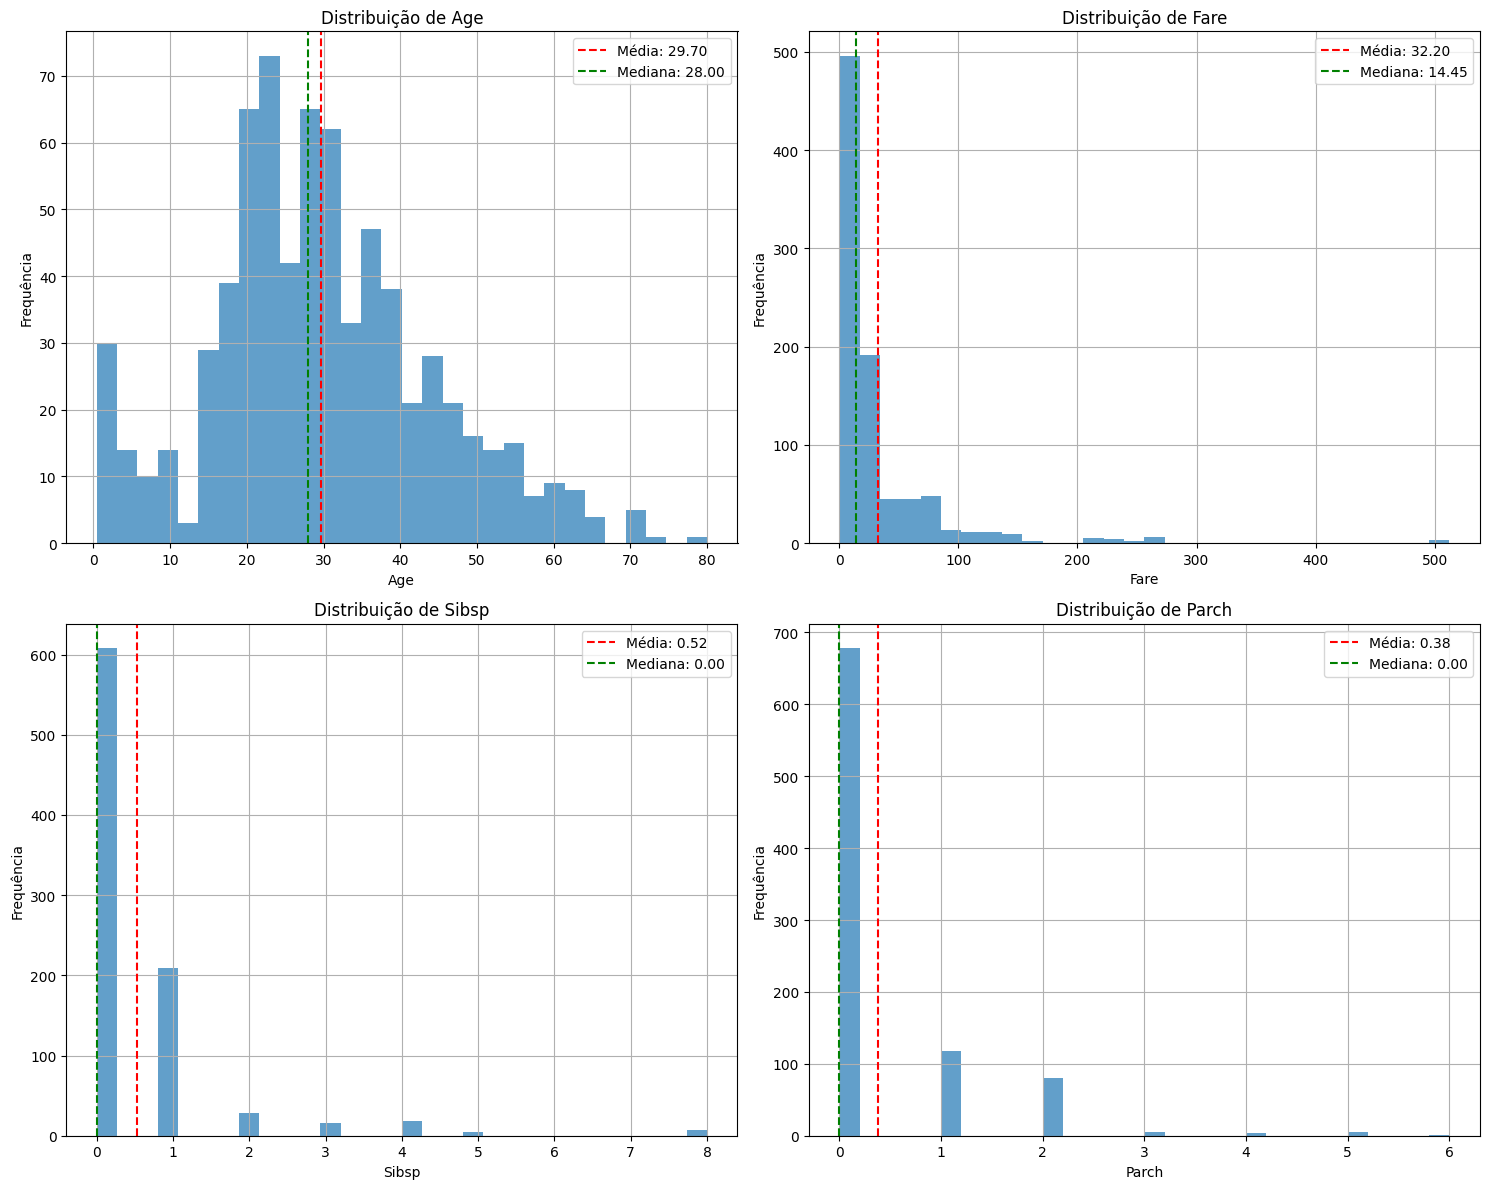

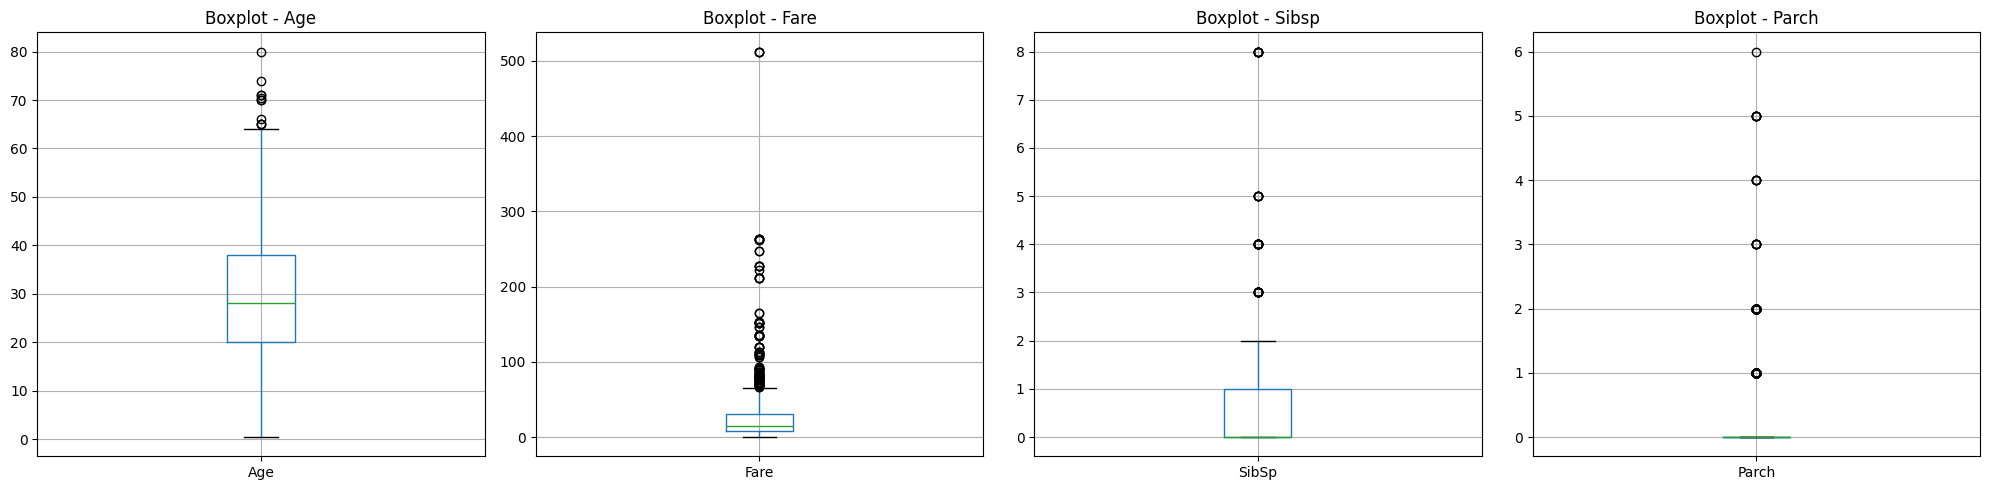

In [36]:
numerical_vars = ['Age', 'Fare', 'SibSp', 'Parch']

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, var in enumerate(numerical_vars):
    if var in df.columns:
        # Histograma
        df[var].hist(bins=30, ax=axes[i], alpha=0.7)
        axes[i].set_title(f'Distribuição de {var.title()}')
        axes[i].set_xlabel(var.title())
        axes[i].set_ylabel('Frequência')
        
        # Adicionar estatísticas
        mean_val = df[var].mean()
        median_val = df[var].median()
        axes[i].axvline(mean_val, color='red', linestyle='--', label=f'Média: {mean_val:.2f}')
        axes[i].axvline(median_val, color='green', linestyle='--', label=f'Mediana: {median_val:.2f}')
        axes[i].legend()

plt.tight_layout()
plt.show()

# Boxplots para identificar outliers
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for i, var in enumerate(numerical_vars):
    if var in df.columns:
        df.boxplot(column=var, ax=axes[i])
        axes[i].set_title(f'Boxplot - {var.title()}')

plt.tight_layout()
plt.show()

### Sobrevivência por Gênero

Contagem:


Survived,0,1
Sex,,
female,81,233
male,468,109



Percentual:


Survived,0,1
Sex,,
female,25.796178,74.203822
male,81.109185,18.890815


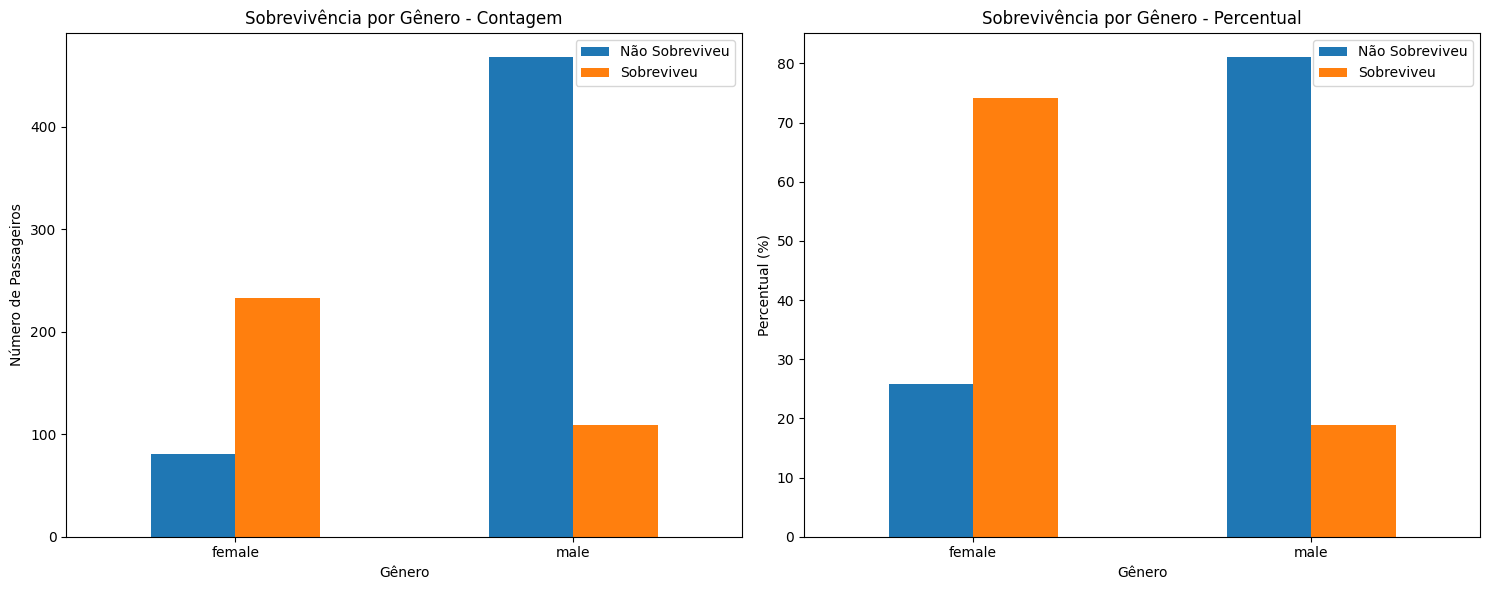

In [40]:
gender_survival = pd.crosstab(df['Sex'], df['Survived'])
gender_survival_pct = pd.crosstab(df['Sex'], df['Survived'], normalize='index') * 100

print("Contagem:")
display(gender_survival)
print("\nPercentual:")
display(gender_survival_pct)

# Visualização
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras agrupadas
gender_survival.plot(kind='bar', ax=ax1)
ax1.set_title('Sobrevivência por Gênero - Contagem')
ax1.set_xlabel('Gênero')
ax1.set_ylabel('Número de Passageiros')
ax1.legend(['Não Sobreviveu', 'Sobreviveu'])
ax1.tick_params(axis='x', rotation=0)

# Gráfico de barras percentual
gender_survival_pct.plot(kind='bar', ax=ax2)
ax2.set_title('Sobrevivência por Gênero - Percentual')
ax2.set_xlabel('Gênero')
ax2.set_ylabel('Percentual (%)')
ax2.legend(['Não Sobreviveu', 'Sobreviveu'])
ax2.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

### Sobrevivência por classe

Contagem:


Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119



Percentual:


Survived,0,1
Pclass,,
1,37.037037,62.962963
2,52.717391,47.282609
3,75.763747,24.236253


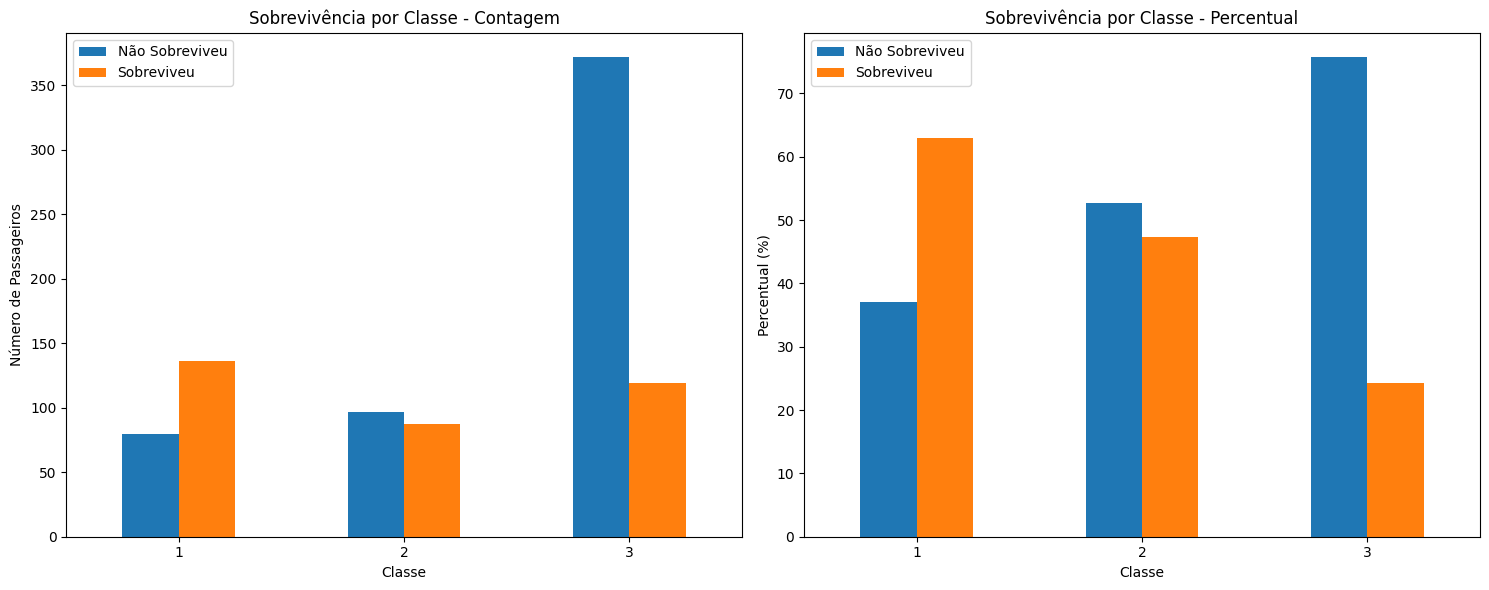

In [45]:
class_survival = pd.crosstab(df['Pclass'], df['Survived'])
class_survival_pct = pd.crosstab(df['Pclass'], df['Survived'], normalize='index') * 100

print("Contagem:")
display(class_survival)
print("\nPercentual:")
display(class_survival_pct)

# Visualização
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

class_survival.plot(kind='bar', ax=ax1)
ax1.set_title('Sobrevivência por Classe - Contagem')
ax1.set_xlabel('Classe')
ax1.set_ylabel('Número de Passageiros')
ax1.legend(['Não Sobreviveu', 'Sobreviveu'])
ax1.tick_params(axis='x', rotation=0)

class_survival_pct.plot(kind='bar', ax=ax2)
ax2.set_title('Sobrevivência por Classe - Percentual')
ax2.set_xlabel('Classe')
ax2.set_ylabel('Percentual (%)')
ax2.legend(['Não Sobreviveu', 'Sobreviveu'])
ax2.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

### Sobrevivência por idade

Percentual por grupo etário:


Survived,0,1
age_group,,
Criança (0-12),42.028986,57.971014
Adolescente (13-18),57.142857,42.857143
Adulto Jovem (19-35),61.731844,38.268156
Adulto (36-60),60.000000,40.000000
Idoso (60+),77.272727,22.727273


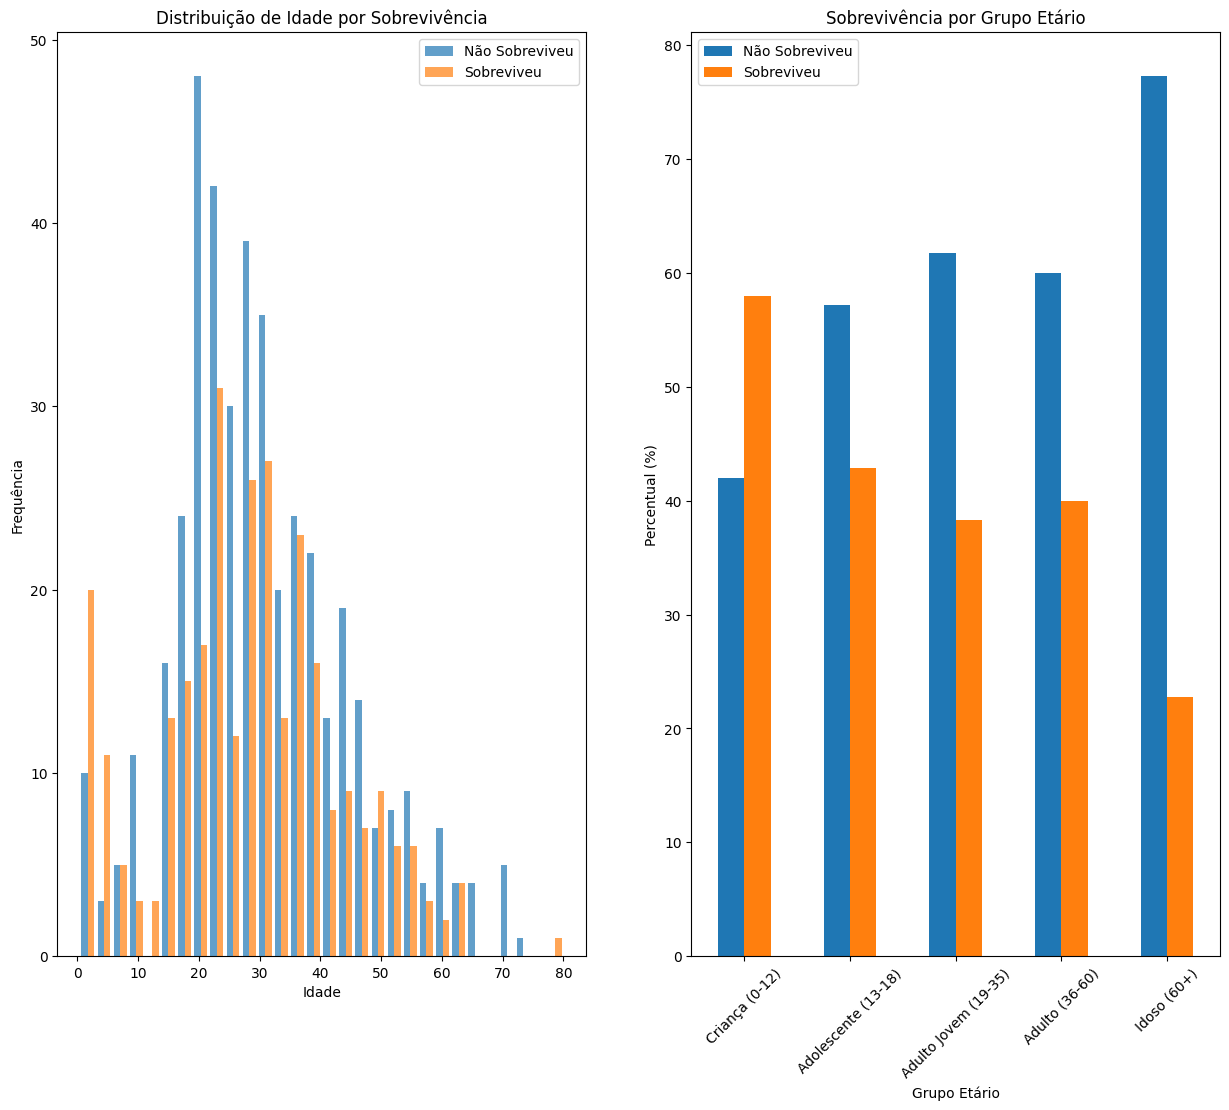

In [66]:
df['age_group'] = pd.cut(df['Age'], 
                        bins=[0, 12, 18, 35, 60, 100], 
                        labels=['Criança (0-12)', 'Adolescente (13-18)', 
                               'Adulto Jovem (19-35)', 'Adulto (36-60)', 'Idoso (60+)'])

age_survival = pd.crosstab(df['age_group'], df['Survived'])
age_survival_pct = pd.crosstab(df['age_group'], df['Survived'], normalize='index') * 100

print("Percentual por grupo etário:")
display(age_survival_pct)

fig, axes = plt.subplots(1, 2, figsize=(15, 12))

axes[0].hist([df[df['Survived']==0]['Age'].dropna(), 
                df[df['Survived']==1]['Age'].dropna()], 
               bins=30, alpha=0.7, label=['Não Sobreviveu', 'Sobreviveu'])
axes[0].set_title('Distribuição de Idade por Sobrevivência')
axes[0].set_xlabel('Idade')
axes[0].set_ylabel('Frequência')
axes[0].legend()


age_survival_pct.plot(kind='bar', ax=axes[1])
axes[1].set_title('Sobrevivência por Grupo Etário')
axes[1].set_xlabel('Grupo Etário')
axes[1].set_ylabel('Percentual (%)')
axes[1].legend(['Não Sobreviveu', 'Sobreviveu'])
axes[1].tick_params(axis='x', rotation=45)

plt.show()

## Principais Fatores de Sobrevivência:

Gênero: As mulheres tiveram uma taxa de sobrevivência significativamente maior que os homens

Classe Social: Passageiros da primeira classe tiveram maior probabilidade de sobrevivência

Idade: Crianças tiveram maiores chances de sobrevivência

Política "Mulheres e Crianças Primeiro": Claramente implementada durante o desastre

# Feature Engineering

In [76]:
df = pd.read_csv('train.csv')
categorical_vars = ['Sex', 'Pclass', 'Embarked', 'Name', 'Cabin', 'Ticket']
numerical_vars = ['Age', 'Fare', 'SibSp', 'Parch']
target = 'Survived'

In [75]:
print(f"Colunas Totais: {df.columns.values}")
print(f"Variáveis categóricas: {categorical_vars}")
print(f"Variáveis numéricas: {numerical_vars}")

Colunas Totais: ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
Variáveis categóricas: ['Sex', 'Pclass', 'Embarked', 'Name', 'Cabin', 'Ticket']
Variáveis numéricas: ['Age', 'Fare', 'SibSp', 'Parch']


Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64


<>:5: SyntaxWarning: invalid escape sequence '\.'
<>:5: SyntaxWarning: invalid escape sequence '\.'
C:\Users\vinic\AppData\Local\Temp\ipykernel_18668\3077789341.py:5: SyntaxWarning: invalid escape sequence '\.'
  title_search = re.search(' ([A-Za-z]+)\.', name)


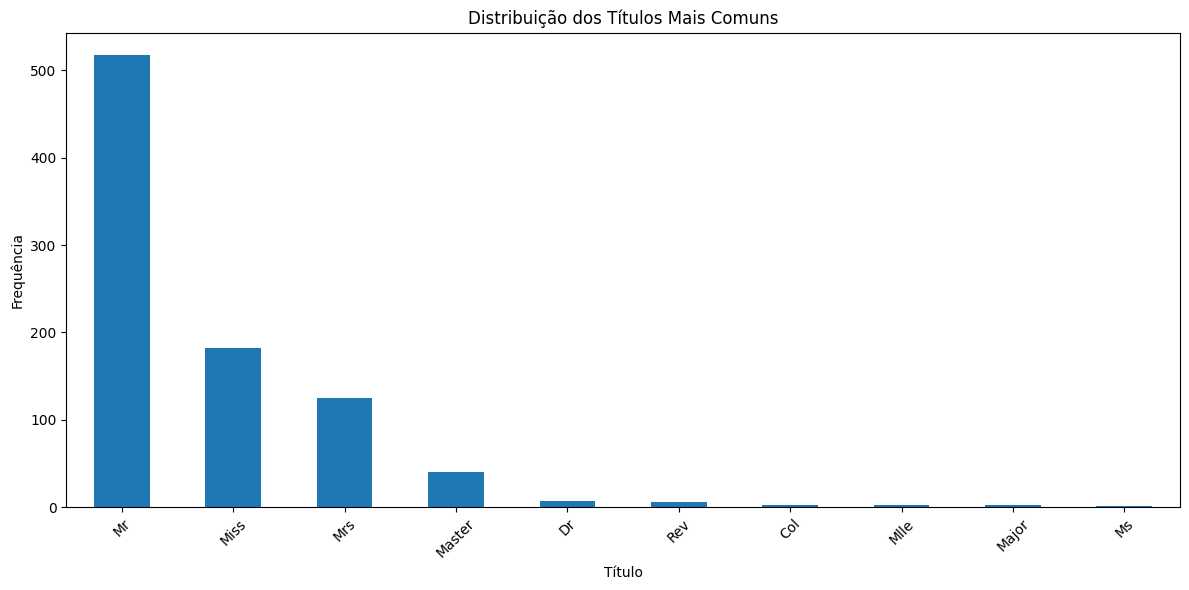

In [79]:
import re

def extract_title(name):
    """Extrai título do nome do passageiro"""
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

# Aplicar extração de título
df['Title'] = df['Name'].apply(extract_title)

print(df['Title'].value_counts())

# Visualizar distribuição de títulos
plt.figure(figsize=(12, 6))
df['Title'].value_counts().head(10).plot(kind='bar')
plt.title('Distribuição dos Títulos Mais Comuns')
plt.xlabel('Título')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Title_Mapped
Mr        517
Miss      184
Mrs       126
Master     40
Rare       24
Name: count, dtype: int64
Title_Mapped
Mrs       0.793651
Miss      0.701087
Master    0.575000
Rare      0.375000
Mr        0.156673
Name: Survived, dtype: float64


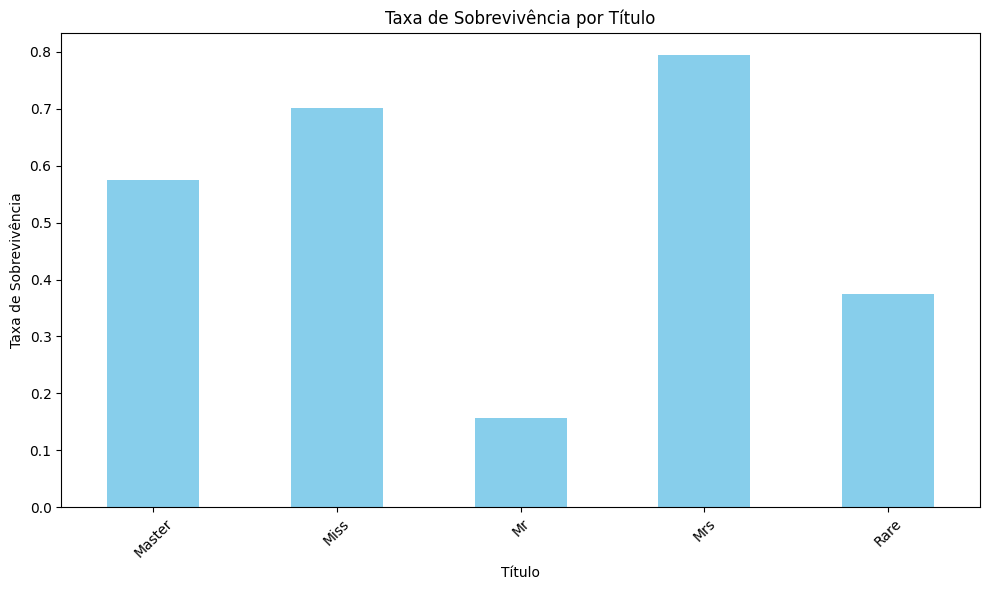

In [81]:
def map_title(title):
    """Mapeia títulos para categorias mais gerais"""
    title_mapping = {
        "Mr": "Mr",
        "Miss": "Miss", 
        "Mrs": "Mrs",
        "Master": "Master",
        "Dr": "Rare",
        "Rev": "Rare",
        "Mlle": "Miss",
        "Major": "Rare", 
        "Col": "Rare",
        "Sir": "Rare",
        "Mme": "Mrs",
        "Don": "Rare",
        "Lady": "Rare",
        "Countess": "Rare",
        "Jonkheer": "Rare",
        "Dona": "Rare",
        "Capt": "Rare"
    }
    return title_mapping.get(title, "Rare")

# Aplicar mapeamento
df['Title_Mapped'] = df['Title'].apply(map_title)

print(df['Title_Mapped'].value_counts())

# Visualizar sobrevivência por título
survival_by_title = df.groupby('Title_Mapped')['Survived'].mean()
print(survival_by_title.sort_values(ascending=False))

# Gráfico
plt.figure(figsize=(10, 6))
survival_by_title.plot(kind='bar', color='skyblue')
plt.title('Taxa de Sobrevivência por Título')
plt.xlabel('Título')
plt.ylabel('Taxa de Sobrevivência')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

=== DISTRIBUIÇÃO POR DECK ===
Deck
Unknown    687
C           59
B           47
D           33
E           32
A           15
F           13
G            4
T            1
Name: count, dtype: int64

=== DISTRIBUIÇÃO DE NÚMERO DE CABINES ===
Cabin_Count
0    687
1    180
2     16
3      6
4      2
Name: count, dtype: int64


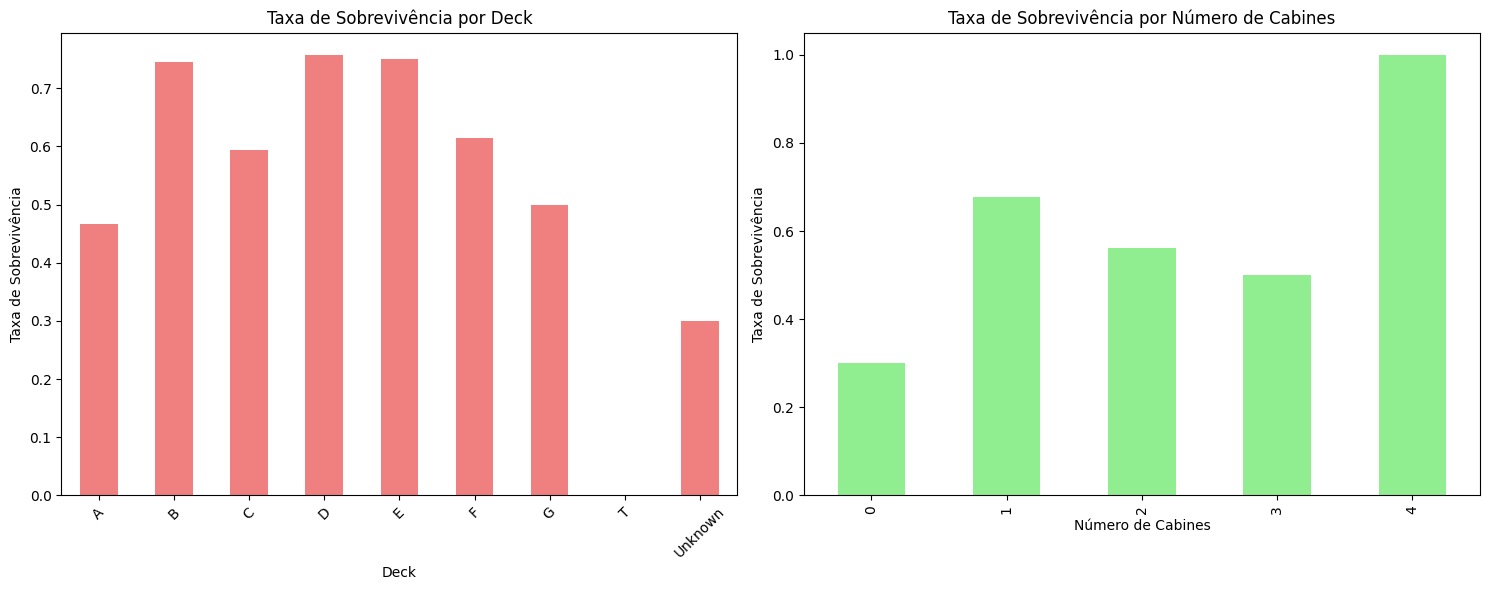

In [82]:
def extract_deck(cabin):
    """Extrai o deck da cabine"""
    if pd.isna(cabin):
        return 'Unknown'
    return cabin[0]

# Função para contar cabines
def count_cabins(cabin):
    """Conta quantas cabines o passageiro possui"""
    if pd.isna(cabin):
        return 0
    return len(cabin.split())

# Aplicar extração de deck e contagem de cabines
df['Deck'] = df['Cabin'].apply(extract_deck)
df['Cabin_Count'] = df['Cabin'].apply(count_cabins)

print("=== DISTRIBUIÇÃO POR DECK ===")
print(df['Deck'].value_counts())

print("\n=== DISTRIBUIÇÃO DE NÚMERO DE CABINES ===")
print(df['Cabin_Count'].value_counts())

# Visualizar sobrevivência por deck
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Sobrevivência por deck
survival_by_deck = df.groupby('Deck')['Survived'].mean()
survival_by_deck.plot(kind='bar', ax=axes[0], color='lightcoral')
axes[0].set_title('Taxa de Sobrevivência por Deck')
axes[0].set_xlabel('Deck')
axes[0].set_ylabel('Taxa de Sobrevivência')
axes[0].tick_params(axis='x', rotation=45)

# Sobrevivência por número de cabines
survival_by_cabin_count = df.groupby('Cabin_Count')['Survived'].mean()
survival_by_cabin_count.plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Taxa de Sobrevivência por Número de Cabines')
axes[1].set_xlabel('Número de Cabines')
axes[1].set_ylabel('Taxa de Sobrevivência')

plt.tight_layout()
plt.show()

=== PREFIXOS DE TICKET MAIS COMUNS ===
Ticket_Prefix
Numeric    661
PC          60
C           33
A           29
STON        18
SOTON       17
CA          14
S           14
SC          13
W           11
Name: count, dtype: int64

=== DISTRIBUIÇÃO DE TAMANHO DOS GRUPOS POR TICKET ===
Ticket_Group_Size
1    547
2    188
3     63
4     44
7     21
Name: count, dtype: int64


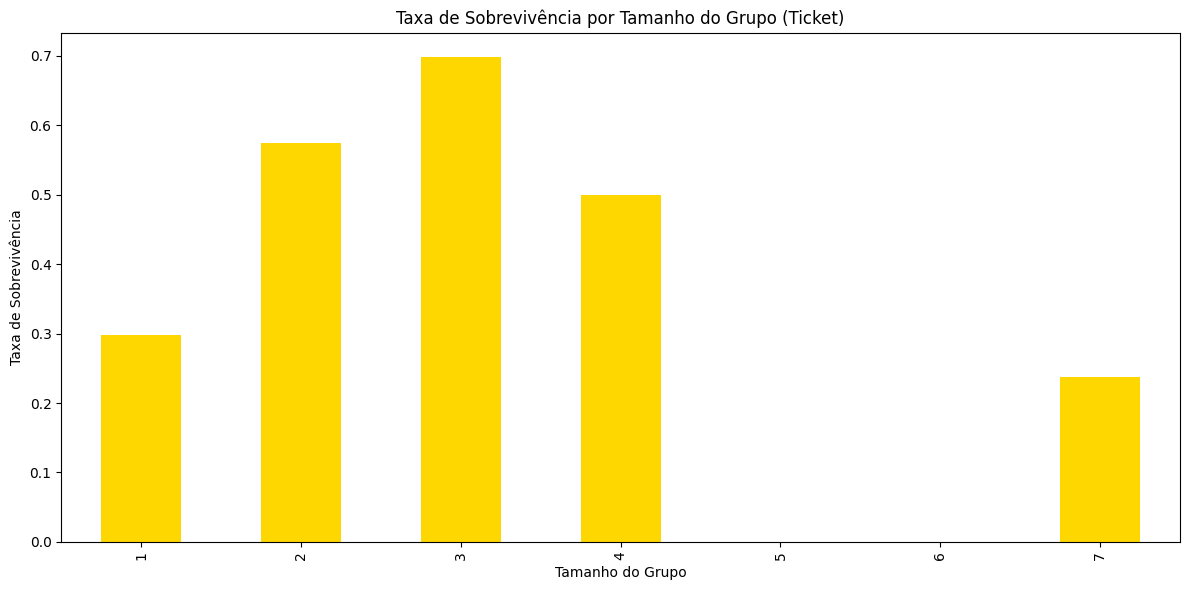

In [ ]:
def extract_ticket_prefix(ticket):
    """Extrai prefixo do ticket"""
    if pd.isna(ticket):
        return 'Unknown'
    
    # Verificar se tem prefixo (letras)
    ticket = str(ticket).upper()
    prefix_match = re.match(r'([A-Z]+)', ticket)
    
    if prefix_match:
        return prefix_match.group(1)
    else:
        return 'Numeric'

# Função para extrair número do ticket
def extract_ticket_number(ticket):
    """Extrai número do ticket"""
    if pd.isna(ticket):
        return 0
    
    # Extrair números do ticket
    numbers = re.findall(r'\d+', str(ticket))
    if numbers:
        return int(numbers[-1])  # Pegar o último número
    return 0

# Aplicar extração de informações do ticket
df['Ticket_Prefix'] = df['Ticket'].apply(extract_ticket_prefix)
df['Ticket_Number'] = df['Ticket'].apply(extract_ticket_number)

print(df['Ticket_Prefix'].value_counts().head(10))

# Verificar se existem tickets duplicados (famílias/grupos)
ticket_counts = df['Ticket'].value_counts()
df['Ticket_Group_Size'] = df['Ticket'].map(ticket_counts)

print(df['Ticket_Group_Size'].value_counts().head())

# Visualizar sobrevivência por tamanho do grupo
plt.figure(figsize=(12, 6))
survival_by_ticket_group = df.groupby('Ticket_Group_Size')['Survived'].mean()
survival_by_ticket_group.head(10).plot(kind='bar', color='gold')
plt.title('Taxa de Sobrevivência por Tamanho do Grupo (Ticket)')
plt.xlabel('Tamanho do Grupo')
plt.ylabel('Taxa de Sobrevivência')
plt.tight_layout()
plt.show()

In [89]:
df['age_group'] = pd.cut(df['Age'], 
                        bins=[0, 12, 18, 35, 60, 100], 
                        labels=['Criança (0-12)', 'Adolescente (13-18)', 
                               'Adulto Jovem (19-35)', 'Adulto (36-60)', 'Idoso (60+)'])

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Valores ausentes em Fare: 0
Valores ausentes após imputação: 0

=== DISTRIBUIÇÃO POR GRUPO DE TARIFA ===
Fare_Group
High         229
Low          223
Very_High    222
Medium       217
Name: count, dtype: int64

=== TAXA DE SOBREVIVÊNCIA POR GRUPO DE TARIFA ===
Fare_Group
Very_High    0.581081
High         0.445415
Medium       0.308756
Low          0.197309
Name: Survived, dtype: float64


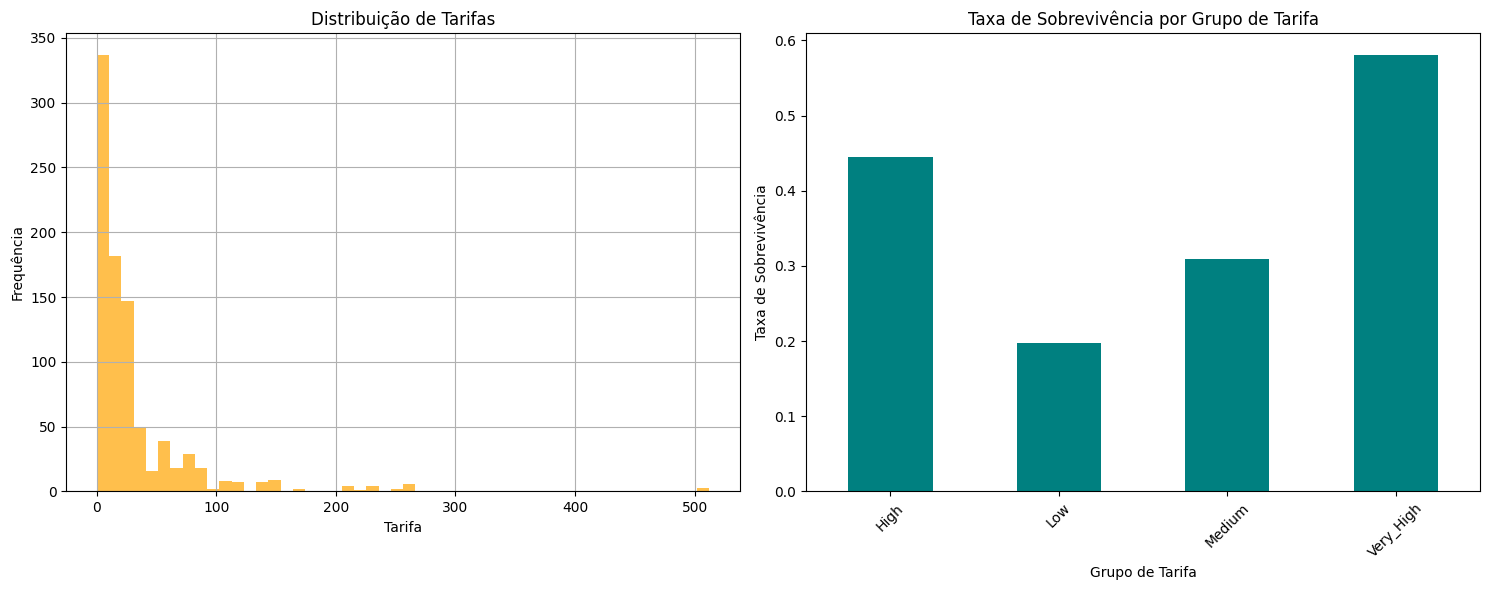

In [90]:
print(df['Fare'].describe())
print(f"\nValores ausentes em Fare: {df['Fare'].isnull().sum()}")

# Imputar valores ausentes de Fare com mediana por classe
df['Fare_Filled'] = df['Fare'].fillna(df.groupby('Pclass')['Fare'].transform('median'))

print(f"Valores ausentes após imputação: {df['Fare_Filled'].isnull().sum()}")

# Função para criar grupos de tarifa
def create_fare_groups(fare):
    """Cria grupos de tarifa baseados em quartis"""
    if pd.isna(fare):
        return 'Unknown'
    elif fare <= 7.91:
        return 'Low'
    elif fare <= 14.454:
        return 'Medium'
    elif fare <= 31:
        return 'High'
    else:
        return 'Very_High'

# Aplicar criação de grupos de tarifa
df['Fare_Group'] = df['Fare_Filled'].apply(create_fare_groups)

print("\n=== DISTRIBUIÇÃO POR GRUPO DE TARIFA ===")
print(df['Fare_Group'].value_counts())

# Taxa de sobrevivência por grupo de tarifa
survival_by_fare_group = df.groupby('Fare_Group')['Survived'].mean()
print("\n=== TAXA DE SOBREVIVÊNCIA POR GRUPO DE TARIFA ===")
print(survival_by_fare_group.sort_values(ascending=False))

# Visualização
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Distribuição de tarifas
df['Fare_Filled'].hist(bins=50, ax=axes[0], alpha=0.7, color='orange')
axes[0].set_title('Distribuição de Tarifas')
axes[0].set_xlabel('Tarifa')
axes[0].set_ylabel('Frequência')

# Sobrevivência por grupo de tarifa
survival_by_fare_group.plot(kind='bar', ax=axes[1], color='teal')
axes[1].set_title('Taxa de Sobrevivência por Grupo de Tarifa')
axes[1].set_xlabel('Grupo de Tarifa')
axes[1].set_ylabel('Taxa de Sobrevivência')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [94]:
df['age_group']

0      Adulto Jovem (19-35)
1            Adulto (36-60)
2      Adulto Jovem (19-35)
3      Adulto Jovem (19-35)
4      Adulto Jovem (19-35)
               ...         
886    Adulto Jovem (19-35)
887    Adulto Jovem (19-35)
888                     NaN
889    Adulto Jovem (19-35)
890    Adulto Jovem (19-35)
Name: age_group, Length: 891, dtype: category
Categories (5, object): ['Criança (0-12)' < 'Adolescente (13-18)' < 'Adulto Jovem (19-35)' < 'Adulto (36-60)' < 'Idoso (60+)']